In [1]:
## Import dependencies
import os
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

#import files and convert to pandas df
file = os.path.join('ACCT.csv')
accounts_df = pd.read_csv(file, encoding="ISO-8859-1")

file = os.path.join('Product.csv')
product_df = pd.read_csv(file, encoding="ISO-8859-1")

file = os.path.join('OPPTY_metadata.csv')
oppt_df = pd.read_csv(file, encoding="ISO-8859-1")
oppt_df = oppt_df.rename(columns={'ACCT ID': 'ACCT_ID'})

In [2]:
# Join the three tables together to create a master file
result = pd.merge(oppt_df, accounts_df, how='left', on=['ACCT_ID'])
mastertable = pd.merge(result, product_df, how='left', on=['Oppty ID'])
mastertable.head()

,Oppty ID,Oppty Type Summary,Flip Date,Close Date,Amount,Oppty.Source.Org,Push Counter,ACCT_ID,Fiscal Close QTR (FYYYQ),Won,ACCT_TYP,LCK_EMP_CNT,SECTOR_NM,SEGMENT,APM Level 1,APM Level 2,APM Level 3,Product Share
0,0060M000011ka1E,New Business,4/10/2016,4/28/2016,6642.00,ECS,0,0013000001MsiOW,FY17Q1,1,Unlimited Customer,17992.0,Pharma,Healthcare,Salesforce Platform,Lightning Platform,Core Lightning Platform,1.000000
1,0060M000011ka1n,Add-On/Upgrade,4/10/2016,4/10/2016,1377.00,AE,0,0013000000hLedR,FY17Q1,1,Enterprise Customer,620.0,Agriculture,Core Mid Market,Core Premier (A la Carte) & Priority,Core Premier (A la Carte),Core Premier (A la Carte),0.245098
2,0060M000011ka1n,Add-On/Upgrade,4/10/2016,4/10/2016,1377.00,AE,0,0013000000hLedR,FY17Q1,1,Enterprise Customer,620.0,Agriculture,Core Mid Market,Sales Cloud,Core Sales (SFA),SFA,0.754902
3,0060M000011ka1Y,Add-On/Upgrade,4/11/2016,4/19/2016,10150.38,AE,0,0013000000BoVX2,FY17Q1,1,Unlimited Customer,87.0,Software and Services,Core Small Business,Sales Cloud,Core Sales (SFA),SFA,0.867000
4,0060M000011ka1Y,Add-On/Upgrade,4/11/2016,4/19/2016,10150.38,AE,0,0013000000BoVX2,FY17Q1,1,Unlimited Customer,87.0,Software and Services,Core Small Business,Sales Cloud,Data.com,Data.com,0.133000


Lets look at customer portfolio of SFDC as a whole

Text(0,0.5,'Wins')

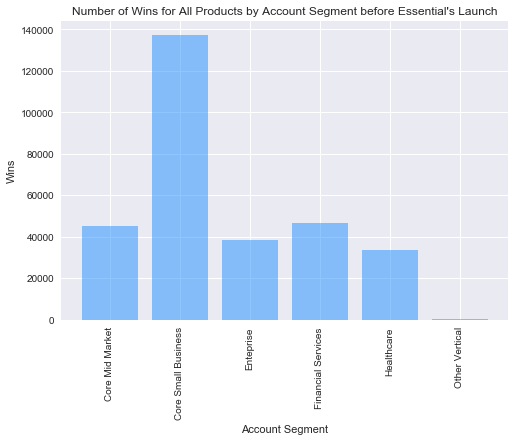

In [6]:
# Group by Segment 
table= mastertable[mastertable['Won'] == 1]
table=mastertable[mastertable['Fiscal Close QTR (FYYYQ)'] < 'FY18Q4']
grouped = table.groupby('SEGMENT')

count=grouped.count()
count.reset_index(level=0, inplace=True)

# Set x axis and tick locations
x_axis = np.arange(len(count))

plt.bar(x_axis, count["Oppty ID"], color='dodgerblue', alpha=0.5)
plt.xticks(x_axis, count["SEGMENT"], rotation="vertical")

# Set x and y limits
#plt.xlim(-0.75, len(x_axis))
#plt.ylim(0, max(count["Oppty ID"])+500)
# plt.tight_layout()
plt.style.use('seaborn')

# Set a Title and labels
plt.title("Number of Wins for All Products by Account Segment before Essential's Launch")
plt.xlabel("Account Segment")
plt.ylabel("Wins")

Text(0,0.5,'# of Accounts')

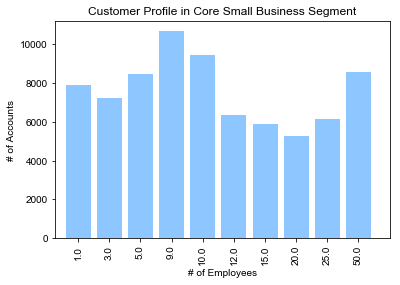

In [3]:
# Group by Employee count 
table=mastertable.loc[mastertable['SEGMENT'].isin(['Core Small Business'])]
grouped = table.groupby('LCK_EMP_CNT')
count=grouped.count()
count.reset_index(level=0, inplace=True)
count= count[count['Oppty ID'] > 5000]

#Plot data
# Set x axis and tick locations
x_axis = np.arange(len(count))

plt.bar(x_axis, count["Oppty ID"], color='dodgerblue', alpha=0.5)
plt.xticks(x_axis, count["LCK_EMP_CNT"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(count["Oppty ID"])+500)
# plt.tight_layout()
plt.style.use('seaborn')

# Set a Title and labels
plt.title("Customer Profile in Core Small Business Segment")
plt.xlabel("# of Employees")
plt.ylabel("# of Accounts")

Text(0,0.5,'Wins')

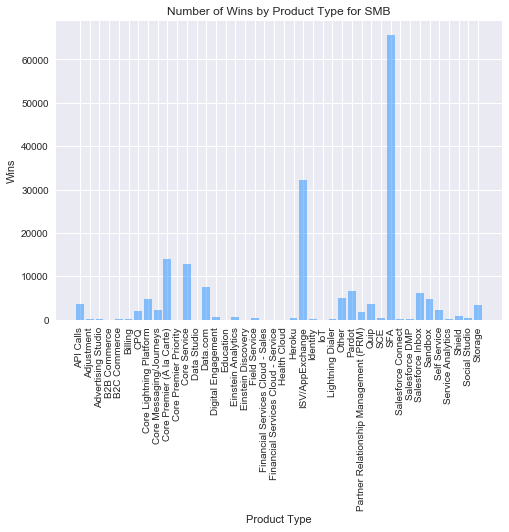

In [7]:
table=table.loc[mastertable['SEGMENT'].isin(['Core Small Business','Core Mid Market'])]
grouped = table.groupby('APM Level 3')

count=grouped.count()
count.reset_index(level=0, inplace=True)

# Set x axis and tick locations
x_axis = np.arange(len(count))

plt.bar(x_axis, count["Oppty ID"], color='dodgerblue', alpha=0.5)
plt.xticks(x_axis, count["APM Level 3"], rotation="vertical")

# Set x and y limits
#plt.xlim(-0.75, len(x_axis))
#plt.ylim(0, max(count["Oppty ID"])+500)
# plt.tight_layout()
plt.style.use('seaborn')

# Set a Title and labels
plt.title("Number of Wins by Product Type for SMB")
plt.xlabel("Product Type")
plt.ylabel("Wins")

Salesforce Essentials was launched FY18Q4. The functionality of this product is far more basic than other editions and offered at a lower price.--> Meets needs of SMB. Lets take a look at who has actually been buying the product since the release date

Text(0,0.5,'Win')

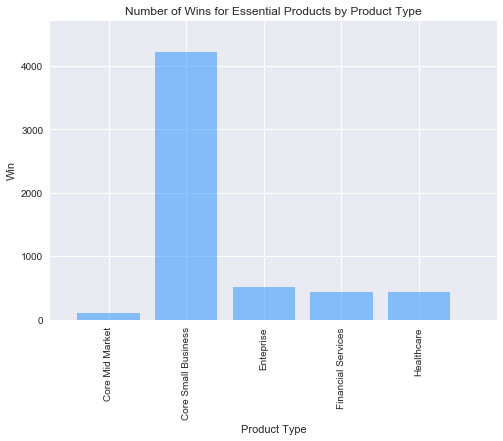

In [8]:
#Filter table by Essentials product
table=mastertable.loc[mastertable['APM Level 2'].isin(['Sales Cloud Essentials','Service Cloud Essentials'])]

# Group by Segment 
grouped = table.groupby('SEGMENT')
count=grouped.count()
count.reset_index(level=0, inplace=True)

##Plot the data

# Set x axis and tick locations
x_axis = np.arange(len(count))

plt.bar(x_axis, count["Oppty ID"], color='dodgerblue', alpha=0.5)
plt.xticks(x_axis, count["SEGMENT"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(count["Oppty ID"])+500)
# plt.tight_layout()
plt.style.use('seaborn')

# Set a Title and labels
plt.title("Number of Wins for Essential Products by Product Type")
plt.xlabel("Product Type")
plt.ylabel("Win")

As expected, small Businesses are the biggest customer. 

Lets look into how many new customers were acquired since Essentials’ launch was in November, 2017 FY18Q4 and how the product is doing compared to Salesforce's other products.

In [9]:

# Quarter of release
table= mastertable[mastertable['Fiscal Close QTR (FYYYQ)'] == 'FY18Q4']

# Group by product and count
grouped = table.groupby('APM Level 2')

count2=grouped.count()
count2.reset_index(level=0, inplace=True)

# Quater after release
table2= mastertable[mastertable['Fiscal Close QTR (FYYYQ)'] == 'FY19Q1']

# Group by product and count
# bar graph for each product
grouped = table2.groupby('APM Level 2')

count3=grouped.count()
count3.reset_index(level=0, inplace=True)

#Quarter before release
table= mastertable[mastertable['Fiscal Close QTR (FYYYQ)'] == 'FY19Q2']

# Group by product and count
grouped = table.groupby('APM Level 2')

count1=grouped.count()
count1.reset_index(level=0, inplace=True)

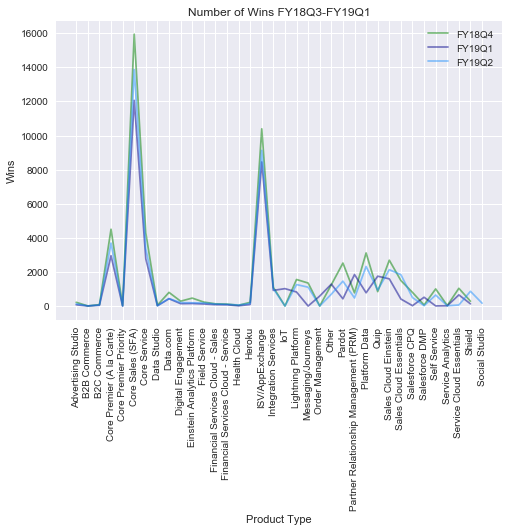

In [10]:
plt.plot(np.arange(len(count2)), count2["ACCT_ID"], color='green', alpha=0.5, label="FY18Q4")
plt.xticks(np.arange(len(count2)), count2["APM Level 2"], rotation="vertical")

plt.plot(np.arange(len(count3)), count3["ACCT_ID"], color='darkblue', alpha=0.5, label="FY19Q1")
plt.xticks(np.arange(len(count3)), count3["APM Level 2"], rotation="vertical")

plt.plot(np.arange(len(count1)), count1["ACCT_ID"], color='dodgerblue', alpha=0.5, label="FY19Q2")
plt.xticks(np.arange(len(count1)), count1["APM Level 2"], rotation="vertical")

plt.style.use('seaborn')

# Set a Title and labels
plt.title("Number of Wins FY18Q3-FY19Q1")
plt.xlabel("Product Type")
plt.ylabel("Wins")

plt.legend()

One of the identified risks, was that instead of winning new SMB customers, the launch of Essentials would canabalize the SMB Account Executives sales. Let's take a closer look at those sales. 

Text(0,0.5,'# of new Wins')

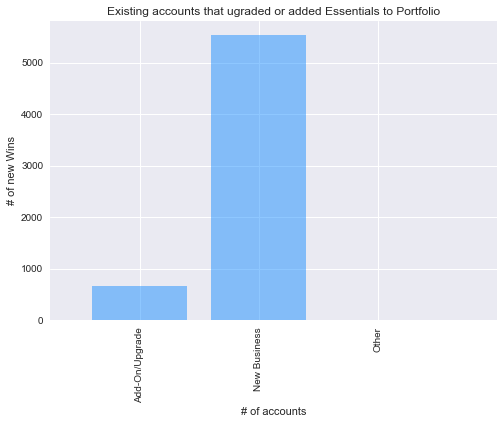

In [11]:
### Select all Essential wins and vizualize the Oppt Type

table=mastertable.loc[mastertable['APM Level 2'].isin(['Sales Cloud Essentials','Service Cloud Essentials'])]
grouped = table.groupby('Oppty Type Summary')

count=grouped.count()
count.reset_index(level=0, inplace=True)


# Set x axis and tick locations
x_axis = np.arange(len(count))


plt.bar(x_axis, count["Oppty ID"], color='dodgerblue', alpha=0.5)
plt.xticks(x_axis, count["Oppty Type Summary"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
#plt.ylim(0, max(count["Oppty Type Summary"])+5)
# plt.tight_layout()
plt.style.use('seaborn')

# Set a Title and labels
plt.title("Existing accounts that ugraded or added Essentials to Portfolio")
plt.xlabel("# of accounts")
plt.ylabel("# of new Wins")

Most seem to be "New Business". Let's take closer look at the "Add-On/Upgrade"

In [7]:
grouped = table5.groupby('APM Level 2_BeforeRelease')

count=grouped.count()
count.reset_index(level=0, inplace=True)
count

,APM Level 2_BeforeRelease,Oppty ID_EssentialSales,Oppty Type Summary_EssentialSales,Flip Date_EssentialSales,Close Date_EssentialSales,Amount_EssentialSales,Oppty.Source.Org_EssentialSales,Push Counter_EssentialSales,ACCT_ID,Fiscal Close QTR (FYYYQ)_EssentialSales,...,Push Counter_BeforeRelease,Fiscal Close QTR (FYYYQ)_BeforeRelease,Won_BeforeRelease,ACCT_TYP_BeforeRelease,LCK_EMP_CNT_BeforeRelease,SECTOR_NM_BeforeRelease,SEGMENT_BeforeRelease,APM Level 1_BeforeRelease,APM Level 3_BeforeRelease,Product Share_BeforeRelease
0,B2C Commerce,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
1,Core Premier (A la Carte),2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
2,Core Sales (SFA),41,41,41,41,41,41,41,41,41,...,41,41,41,41,41,41,38,41,41,41
3,Core Service,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2
4,Lightning Platform,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
5,Messaging/Journeys,1,1,1,1,1,1,1,1,1,...,1,1,1,1,1,1,1,1,1,1
6,Quip,7,7,7,7,7,7,7,7,7,...,7,7,7,7,7,7,6,7,7,7
7,Sales Cloud Einstein,2,2,2,2,2,2,2,2,2,...,2,2,2,2,2,2,2,2,2,2


In [9]:
(41/(1+2+41+2+1+1+7+2))*100

71.9298245614035

Text(0,0.5,'# of new Wins')

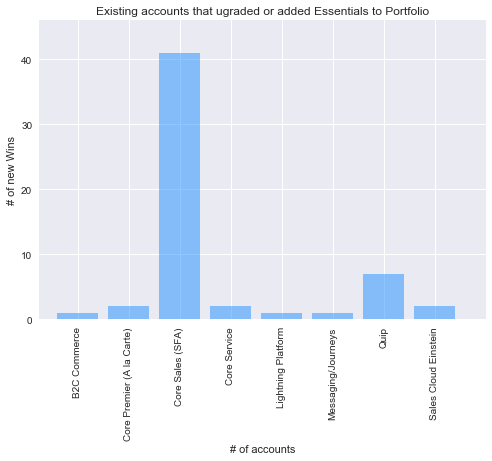

In [6]:
### Select all Essential wins that are not tagged as Oppty Type Summary= "New Business"
table3= table[table['Oppty Type Summary'] != 'New Business']

### now see if any of these accounts existed before launch  FY18Q4 with  different product
table4=mastertable[mastertable['Fiscal Close QTR (FYYYQ)'] < 'FY18Q4']

# Inner join to select the accounts that existed prior to Essential Launch and were tagged as "Add-On/Upgrade
table5=pd.merge(table3,table4, how='inner', on=['ACCT_ID'],suffixes=("_EssentialSales","_BeforeRelease"))

grouped = table5.groupby('APM Level 2_BeforeRelease')

count=grouped.count()
count.reset_index(level=0, inplace=True)

# Set x axis and tick locations
x_axis = np.arange(len(count))


plt.bar(x_axis, count["Oppty ID_EssentialSales"], color='dodgerblue', alpha=0.5)
plt.xticks(x_axis, count["APM Level 2_BeforeRelease"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
plt.ylim(0, max(count["Oppty ID_EssentialSales"])+5)
# plt.tight_layout()
plt.style.use('seaborn')

# Set a Title and labels
plt.title("Existing accounts that ugraded or added Essentials to Portfolio")
plt.xlabel("# of accounts")
plt.ylabel("# of new Wins")

In [23]:
## Looking at % of core sales add ons

# find all accounts with core sales opporunities
table6=mastertable[mastertable['APM Level 2'] == 'Core Sales (SFA)']

# find all accounts that had a "Add On"
table7=mastertable[mastertable['Oppty Type Summary'] == 'Add-On/Upgrade']

# do inner join to find which accounts are in both

table8=pd.merge(table6,table7, how='left', on=['ACCT_ID'])
# join back to master data to get all opportunities for those accounts

table9=pd.merge(table8,mastertable, how='left', on=['ACCT_ID'])

KeyboardInterrupt: 

In [ ]:

table9.count()

In [26]:
table9["ACCT_ID"].nunique()

0.026198417871154903

In [12]:
table6=mastertable[mastertable['APM Level 2'] == 'Core Sales (SFA)']
table6["Oppty ID"].count()

156498

What is the cost of customer acquistion of Essential? To answer that lets look at sales channel for all prodcts. You can see from graph below, mostly from Account Executives

Text(0,0.5,'# of new Wins')

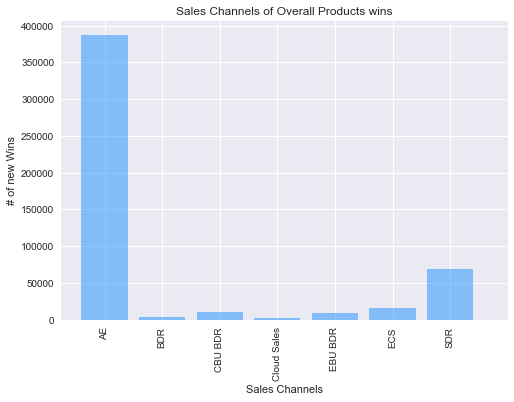

In [27]:
grouped = mastertable.groupby('Oppty.Source.Org')

count=grouped.count()
count.reset_index(level=0, inplace=True)

# Set x axis and tick locations
x_axis = np.arange(len(count))


plt.bar(x_axis, count["Oppty ID"], color='dodgerblue', alpha=0.5)
plt.xticks(x_axis, count["Oppty.Source.Org"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
# plt.ylim(0, max(count["Oppty.Source.Org"])+500)
# plt.tight_layout()
plt.style.use('seaborn')

# Set a Title and labels
plt.title("Sales Channels of Overall Products wins")
plt.xlabel("Sales Channels")
plt.ylabel("# of new Wins")

Looking at just Essential product in comparison

Text(0,0.5,'# of new Wins')

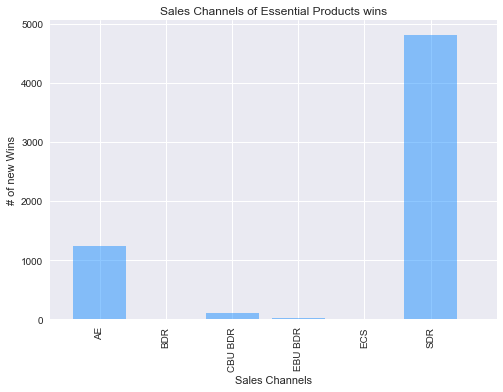

In [28]:
# Group by Oppty.Source.Org 
table=mastertable.loc[mastertable['APM Level 2'].isin(['Sales Cloud Essentials','Service Cloud Essentials'])]
table.head()

grouped = table.groupby('Oppty.Source.Org')

count=grouped.count()
count.reset_index(level=0, inplace=True)

# Set x axis and tick locations
x_axis = np.arange(len(count))


plt.bar(x_axis, count["Oppty ID"], color='dodgerblue', alpha=0.5)
plt.xticks(x_axis, count["Oppty.Source.Org"], rotation="vertical")

# Set x and y limits
plt.xlim(-0.75, len(x_axis))
# plt.ylim(0, max(count["Oppty.Source.Org"])+500)
# plt.tight_layout()
plt.style.use('seaborn')

# Set a Title and labels
plt.title("Sales Channels of Essential Products wins")
plt.xlabel("Sales Channels")
plt.ylabel("# of new Wins")